In [1]:
import numpy as np
import matplotlib.pyplot as plt

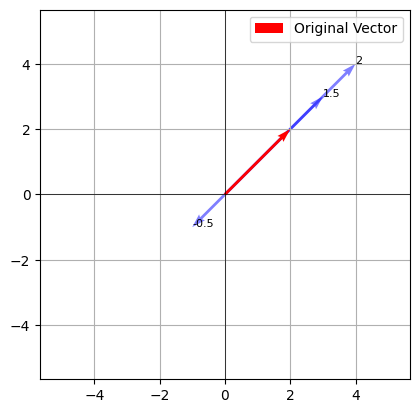

In [2]:
def plot_scaled_vectors(vector, coefficients):
  vector = np.array(vector)
  max_coeff = max(coefficients)
  axis_limit = max_coeff * np.linalg.norm(vector)

  plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1,
             color='r', label='Original Vector', zorder=2)

  for coeff in coefficients:
    scaled_vector = coeff * vector
    plt.quiver(0, 0, scaled_vector[0], scaled_vector[1], angles='xy',
               scale_units='xy', scale=1, color='b', alpha=0.5,
               linestyle='dashed', zorder=1)
    plt.text(scaled_vector[0], scaled_vector[1], f'{coeff}', color='k', fontsize=8)

  plt.xlim(-axis_limit, axis_limit)
  plt.ylim(-axis_limit, axis_limit)
  plt.gca().set_aspect('equal', adjustable='box')

  plt.axhline(0, color='black', linewidth=0.5)
  plt.axvline(0, color='black', linewidth=0.5)
  plt.grid()
  plt.legend()


vector = [2, 2]
coefficients = [-0.5, 1.5, 2]
plot_scaled_vectors(vector, coefficients)

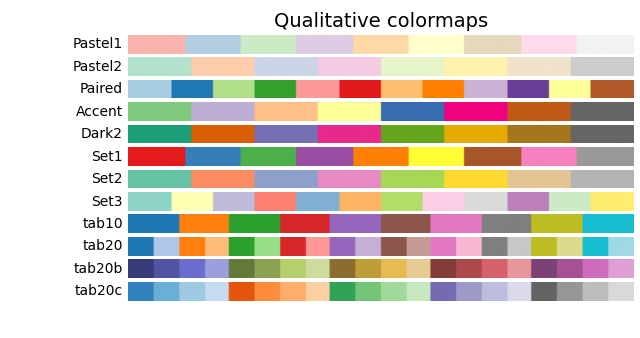

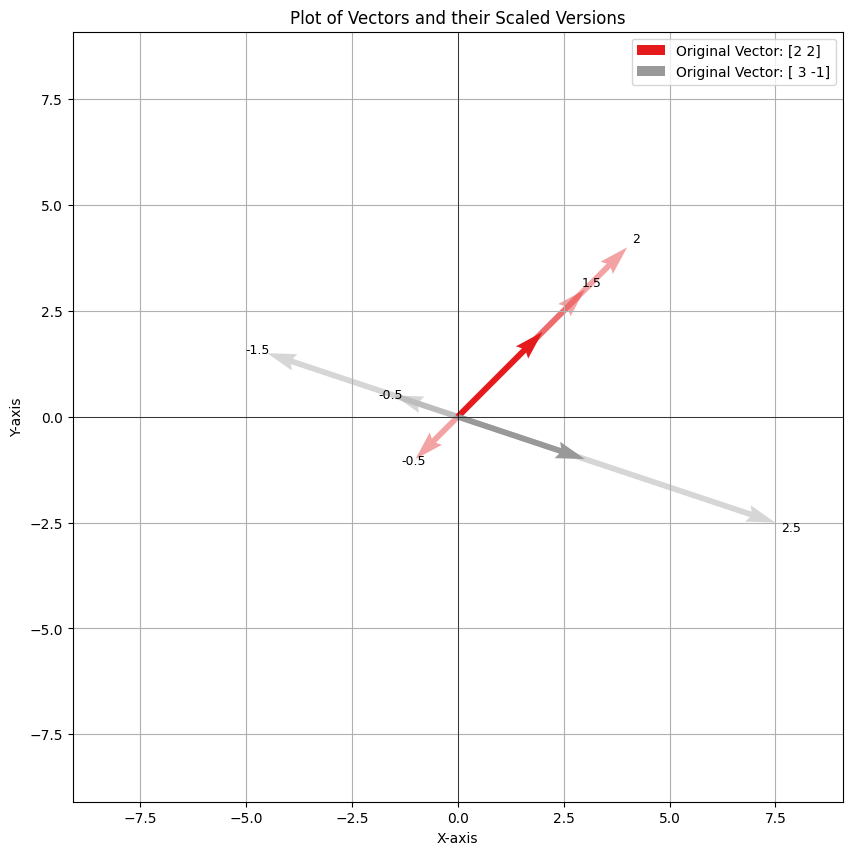

In [3]:
import matplotlib.pyplot as plt
import numpy as np


def plot_scaled_vectors(vector_data):
  """
  Plots multiple vectors and their scaled versions.

  Args:
    vector_data (list): A list of tuples, where each tuple contains:
                        - A 2D vector (list or numpy array).
                        - A list of scalar coefficients.
                        Example: [([2, 2], [-0.5, 1.5, 2]), ([3, -1], [-2, 0.5])]
  """
  # Create a colormap to assign a unique color to each vector family
  colors = plt.get_cmap('Set1', len(vector_data))

  max_val = 0
  # --- Pre-calculate Axis Limits ---
  for vector, coefficients in vector_data:
    vector = np.array(vector)
    max_val = max(max_val, np.linalg.norm(vector))
    if coefficients:
      # We need the coefficient with the largest absolute value to find the max reach
      max_coeff = max(abs(c) for c in coefficients)
      max_val = max(max_val, max_coeff * np.linalg.norm(vector))

  # Add some padding to the axis limit
  axis_limit = max_val * 1.15

  plt.figure(figsize=(10, 10))

  # --- Plotting Loop ---
  for i, (vector, coefficients) in enumerate(vector_data):
    vector = np.array(vector)
    color = colors(i)  # Assign a color for this vector and its scaled versions

    # Plot the original vector (solid line, higher zorder to be on top)
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1,
               color=color, label=f'Original Vector: {vector}', zorder=2)

    # Plot all scaled versions of the current vector
    for coeff in coefficients:
      scaled_vector = coeff * vector

      # Plot the scaled vector (dashed, lower zorder to be in the back)
      plt.quiver(0, 0, scaled_vector[0], scaled_vector[1], angles='xy',
                 scale_units='xy', scale=1, color=color, alpha=0.4,
                 linestyle='dashed', zorder=1)

      # We multiply by 1.05 to place the text slightly away from the arrowhead
      plt.text(scaled_vector[0] * 1.05, scaled_vector[1] * 1.05, f'{coeff}',
               color='k', fontsize=9, ha='center', va='center')

  # --- Plot Formatting ---
  plt.xlim(-axis_limit, axis_limit)
  plt.ylim(-axis_limit, axis_limit)

  # Set aspect ratio to 'equal' so that the angles of vectors are represented correctly
  plt.gca().set_aspect('equal', adjustable='box')

  plt.axhline(0, color='black', linewidth=0.5)
  plt.axvline(0, color='black', linewidth=0.5)
  plt.grid(True)
  plt.legend()
  plt.title("Plot of Vectors and their Scaled Versions")
  plt.xlabel("X-axis")
  plt.ylabel("Y-axis")
  plt.show()


# Define the data as a list of tuples: (vector, coefficients)
vector_families = [
    ([2, 2], [-0.5, 1.5, 2]),
    ([3, -1], [-1.5, -0.5, 2.5])
]

plot_scaled_vectors(vector_families)